# Ames Housing: Project 2
#### Brandie Hatch

## Define the Problem

Interest: increase housing access for Black or African American individuals and families in Ames, Iowa. <br>

Goal: Using the Ames, Iowa Housing Kaggle data set, Census Demographic Data for population density by race and hispanic origin along with the Income by Location Median Household Income map create a model to predict the Sales Price of houses in a certain area of Ames, Iowa. <br>

Problem: As the Black or African American populations rise in a census tract area, how does the sale price of houses in Ames, Iowa change? 


## Background

The Ames population was estimated at 58,965 during the 2010 Census. This includes student enrollment at ISU. Iowa State University of Science and Technology (ISU) serves over 36,000 students from all over the world and is located in the heart of Ames, Iowa. 
https://www.cityofames.org/about-ames/interesting-facts-about-ames<br>

Across the United States, Black homeowner rates have only increased 1.2% between 1970 and 2019. Historic real estate practices still plague the market today even though they have been outlawed since the Fair Housing Act of 1968 was passed. The Fair Housing Act prohibits private and public housing discrimination and requires the federal government to administer all federal housing and community development programs to affirm fair housing practices. <br>

Unfortunately, discrimination still occurs. Redlining is the historic act of deeming certain areas as excessively risky for investment. As noted in the NPR article __Black Americans and the Racist Architecture of Homeownership__ [May 8, 2021](https://www.npr.org/sections/codeswitch/2021/05/08/991535564/black-americans-and-the-racist-architecture-of-homeownership), "one way Black people and other minority groups were left out systematically was through a process known as "redlining" which labeled certain areas as "risky" for a home loan. African Americans and immigrants were relegated to areas, marked in red on government-sponsored maps, where poverty was most concentrated and housing was deteriorating." <br>

Today, the term “redlining” is used to describe certain historic race-based segregating tactics in real estate — from real estate agents directing Black home buyers and renters to certain neighborhoods and away from others to racial rules in many suburbs and developments. "Houses that are essentially the same with the exception of one being in a majority Black neighborhood and one in a majority white neighborhood have almost a 50 percent difference in value", Twedt-Ball said in the Iowa newspaper [The Gazette](https://www.thegazette.com/education/redlining-continues-to-create-racial-disparity-in-homeownership-in-cedar-rapids-iowa/).<br>

Many of the same neighborhoods that were redlined in the past continue to high poverty rates, lower median household incomes, and higher levels of marginalized populations. "Historically redlined areas have been cumulatively affected by a low prevalence of home ownership, uneven economic development, displacement of residents, and lack of access to education and economic opportunities." From: (https://publichealth.berkeley.edu/news-media/research-highlights/research-more-oil-and-gas-wells-in-redlined-neighborhoods/)

## Data Import

In [97]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm


%matplotlib inline


from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV, RidgeCV, Ridge, Lasso, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer, TransformedTargetRegressor

pd.options.display.max_columns =999

In [98]:
ames_train = pd.read_csv('../data/train.csv')
ames_test = pd.read_csv('../data/test.csv')

In [99]:
# rename columns to snake_case 
ames_train.columns = ames_train.columns.str.lower().str.replace(' ', '_')
ames_test.columns = ames_test.columns.str.lower().str.replace(' ', '_')

# change column name for "year_remod/add" to remove the "/""
ames_train.columns = ['year_remod_add' if x=='year_remod/add' else x for x in ames_train.columns]
ames_test.columns = ['year_remod_add' if x=='year_remod/add' else x for x in ames_test.columns]

## Data Exploration

In [100]:
# The number of columns is different because the test dataset does not have the Saleprice column.
print(ames_train.shape, ames_test.shape)
print(set(ames_train.columns) - set(ames_test.columns))

(2051, 81) (878, 80)
{'saleprice'}


In [101]:
ames_train.isnull().sum().sort_values(ascending=False).loc[lambda x: x > 0]
# None of the columns planned to be used hold null or na data, so no columns will be removed at this point

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_qual        114
garage_yr_blt      114
garage_cond        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_area        22
mas_vnr_type        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_area          1
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
bsmtfin_sf_1         1
garage_cars          1
dtype: int64

In [102]:
ames_test.isnull().sum().sort_values(ascending=False).loc[lambda x: x >0]
# None of the columns planned to be used hold null or na data

pool_qc           874
misc_feature      837
alley             820
fence             706
fireplace_qu      422
lot_frontage      160
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
garage_type        44
bsmtfin_type_1     25
bsmt_qual          25
bsmt_cond          25
bsmt_exposure      25
bsmtfin_type_2     25
electrical          1
mas_vnr_type        1
mas_vnr_area        1
dtype: int64

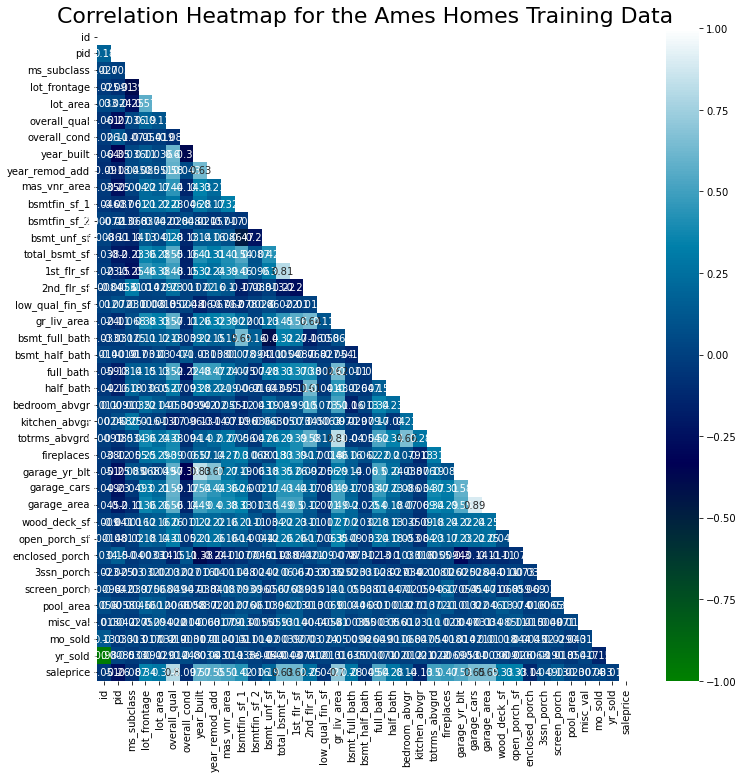

In [164]:
 # Correlation Heatmap 
plt.figure(figsize=(12,12))
mask = np.triu(np.ones_like(ames_train.corr(), dtype=bool))
sns.heatmap(ames_train.corr(), vmin=-1, vmax=1, cmap='ocean', mask=mask, annot=True)
plt.title('Correlation Heatmap for the Ames Homes Training Data', fontsize=22);

The following boxplots for year built show some outliers that are within a normal range for historic housing.

C:\Users\hatch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


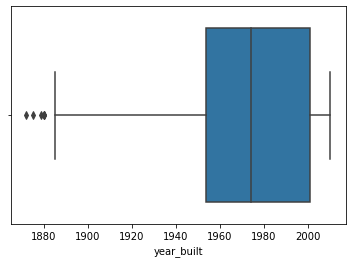

In [103]:
sns.boxplot(ames_train.year_built);

C:\Users\hatch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


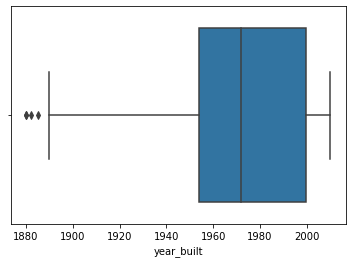

In [104]:
sns.boxplot(ames_test.year_built);

The following boxplots for year where the house had an addition built or parts remodeled show only one strange outlier before 1950. Both train and test datasets have it. The minimum value of the column was at 1950, so the outlier must be showing that minimum year.

In [105]:
ames_train['year_remod_add'].describe()

count    2051.000000
mean     1984.190151
std        21.036250
min      1950.000000
25%      1964.500000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: year_remod_add, dtype: float64

C:\Users\hatch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


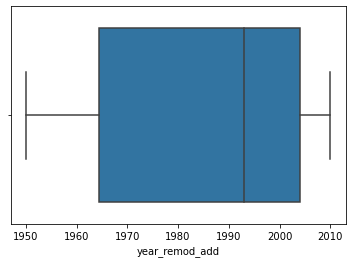

In [106]:
sns.boxplot(ames_train.year_remod_add);

C:\Users\hatch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


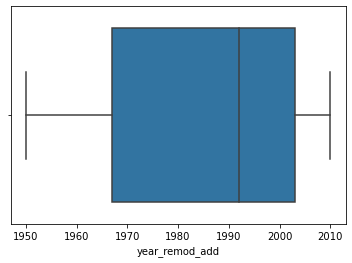

In [107]:
sns.boxplot(ames_test.year_remod_add);

The two boxplots for ms_subclass identify the type of dwelling involved in the sale. It is logical for there to be a couple of outliers at the higher end of the data (especially since none go over the max 190) because the dictionary shows those as different types of Planned Unit Developments (PUD). [A PUD is a community of single family homes. The homes could be condos or townhomes and there is often a homeowners association (HOA)](https://www.forbes.com/advisor/mortgages/what-is-a-planned-unit-development/).

C:\Users\hatch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


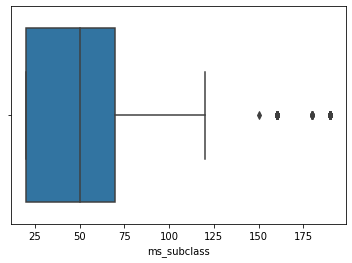

In [108]:
sns.boxplot(ames_train.ms_subclass);

C:\Users\hatch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


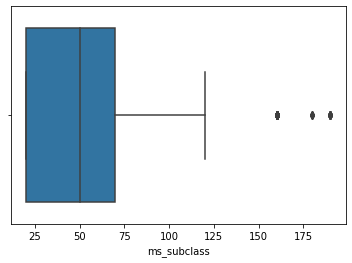

In [109]:
sns.boxplot(ames_test.ms_subclass);

In [110]:
ames_train['ms_subclass'].describe()

count    2051.000000
mean       57.008776
std        42.824223
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: ms_subclass, dtype: float64

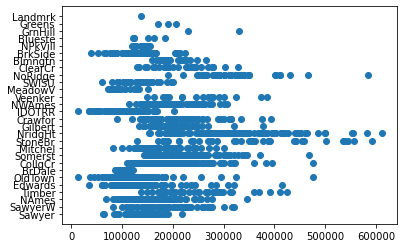

In [111]:
# viewed a quick scatter plot to see if there were any direct correlations beetween saleprice and neighborhood.
plt.scatter(x='saleprice', y='neighborhood', data=ames_train)

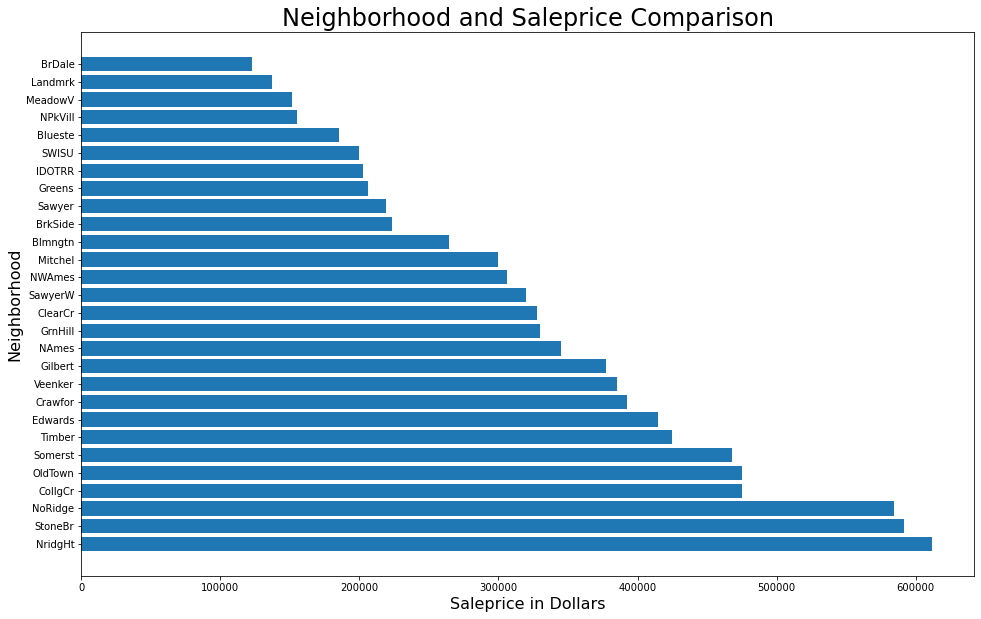

In [112]:
# viewed a bar plot to see if there were any significant differences with the neighborhoods and saleprice
neighborhoods = ames_train.sort_values(by='saleprice', ascending=False)
plt.figure(figsize=(16, 10))
plt.barh(
    y='neighborhood',
    width='saleprice',
    data=neighborhoods
)
plt.title("Neighborhood and Saleprice Comparison", fontdict={"fontsize": 24})
plt.xlabel("Saleprice in Dollars", fontsize = 16)
plt.ylabel("Neighborhood", fontsize = 16);

## Feature Engineering

In [113]:
# Duplicate and rename neighborhood column to create the beginning of the neighborhood code 'n_code' column for future feature use
ames_train['n_code'] = ames_train['neighborhood']
ames_test['n_code'] = ames_test['neighborhood']

In [114]:
neighborhood_6sort_dict = {
    'Blmngtn': 'N',
    'Blueste': 'SWISU',
    'BrDale': 'N',
    'BrkSide': 'E',
    'ClearCr': 'NW',
    'CollgCr': 'S',
    'Crawfor': 'SWISU',
    'Edwards': 'S',
    'Gilbert': 'N',
    'Greens': 'ISU',
    'GrnHill': 'S',
    'IDOTRR': 'E',
    'Landmrk': 'ISU',
    'MeadowV': 'S',
    'Mitchel': 'S',
    'NAmes': 'N',
    'NoRidge': 'N',
    'NPkVill': 'N',
    'NridgHt': 'N',
    'NWAmes': 'N',
    'OldTown': 'E',
    'Sawyer': 'NW',
    'SawyerW': 'NW',
    'Somerst': 'N',
    'StoneBr': 'N',
    'SWISU': 'SWISU',
    'Timber': 'S',
    'Veenker': 'NW'
}

In [115]:
# replace the copied data with the dictionary data to create a new mapped column
ames_train = ames_train.replace({'n_code': neighborhood_6sort_dict})
ames_test = ames_test.replace({'n_code': neighborhood_6sort_dict})

In [116]:
# Duplicate and rename neighborhood column to create the beginning of the neighborhood code 'percent_pop' column for future feature use
ames_train['percent_pop'] = ames_train['neighborhood']
ames_test['percent_pop'] = ames_test['neighborhood']

In [117]:
neighborhood_percentpop_dict = {
    'Blmngtn': '2.4',
    'Blueste': '3.2',
    'BrDale': '4.6',
    'BrkSide': '4.9',
    'ClearCr': '3.8',
    'CollgCr': '6.1',
    'Crawfor': '3.2',
    'Edwards': '8.9',
    'Gilbert': '2.4',
    'Greens': '8.4',
    'GrnHill': '4.2',
    'IDOTRR': '8.9',
    'Landmrk': '8.4',
    'MeadowV': '4.2',
    'Mitchel': '4.2',
    'NAmes': '5',
    'NoRidge': '3.5',
    'NPkVill': '4.6',
    'NridgHt': '2.4',
    'NWAmes': '3.5',
    'OldTown': '4.9',
    'Sawyer': '6.4',
    'SawyerW': '6.4',
    'Somerst': '4.6',
    'StoneBr': '2.4',
    'SWISU': '9.2',
    'Timber': '4.2',
    'Veenker': '6.4'
}

In [118]:
# replace the copied data with the dictionary data to create a new mapped column
ames_train = ames_train.replace({'percent_pop': neighborhood_percentpop_dict})
ames_test = ames_test.replace({'percent_pop': neighborhood_percentpop_dict})

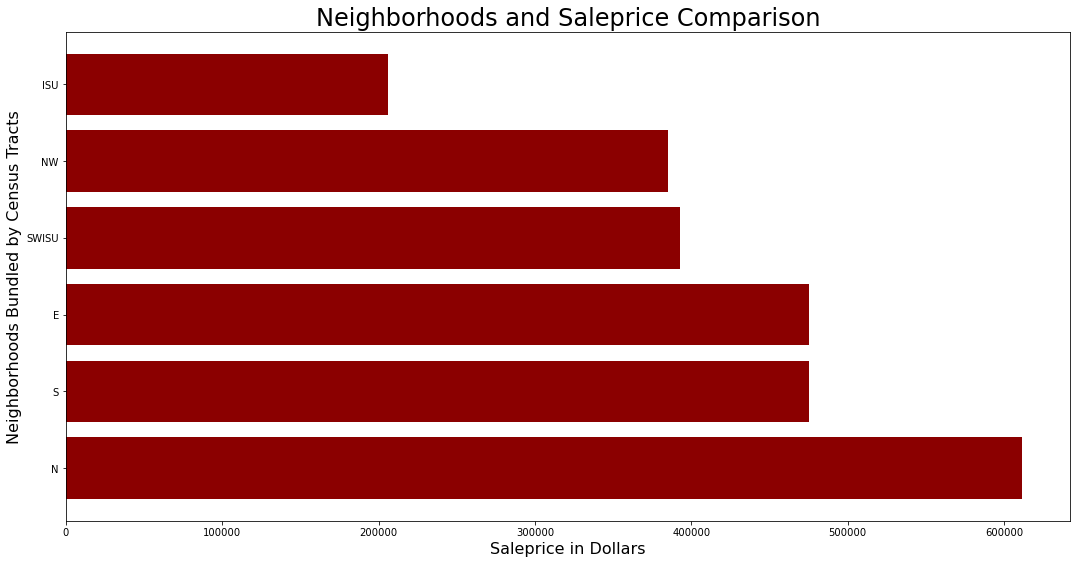

In [187]:
neighborhood_bundle = ames_train.sort_values(by='saleprice', ascending=False)

plt.figure(figsize=(18, 9))
plt.barh(
    y='n_code',
    width='saleprice',
    data=neighborhood_bundle,
    color='darkred'
)
plt.title("Neighborhoods and Saleprice Comparison", fontdict={"fontsize": 24})
plt.xlabel("Saleprice in Dollars", fontsize = 16)
plt.ylabel("Neighborhoods Bundled by Census Tracts", fontsize = 16);

## Prepare training data: split into training and validation sets

In [120]:
features = ['id', 'ms_subclass', 'ms_zoning', 'neighborhood', 'n_code', 'percent_pop', 'condition_1', 'condition_2', 'overall_qual', 'overall_cond', 'year_built', 'year_remod_add', 'sale_type']
X = ames_train[features]
y = ames_train['saleprice']

# drop 'pid' column data from test to match train
ames_test = ames_test[['id', 'ms_subclass', 'ms_zoning', 'neighborhood', 'n_code', 'percent_pop', 'condition_1', 'condition_2', 'overall_qual', 'overall_cond', 'year_built', 'year_remod_add', 'sale_type']]

In [121]:
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=37
)

In [122]:
# check shapes
print(f"Shape of original data frame: {ames_train.shape}")
print(" ")
print(f"Shape of X train: {X_train.shape}")
print(f"Shape of y train: {y_train.shape}")
print(" ")
print(f"Shape of X validation: {X_val.shape}")
print(f"Shape of y validation: {y_val.shape}")
print(" ")
print(f"Shape of test: {ames_test.shape}")

Shape of original data frame: (2051, 83)
 
Shape of X train: (1640, 13)
Shape of y train: (1640,)
 
Shape of X validation: (411, 13)
Shape of y validation: (411,)
 
Shape of test: (878, 13)


### Data Dictionary

https://www.tablesgenerator.com/markdown_tables# <br>

| **Feature**        | **Type** | **Dataset**  | **Description**                                                                                                                                                                                                              |
|--------------------|----------|--------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **id**             | _int64_  | train & test | ID number used for Kaggle Submission.                                                                                                                                                                                        |
| **ms_subclass**    | _object_ | train & test | Identifies the type of dwelling involved in the sale.                                                                                                                                                                        |
| **ms_zoning**      | _object_ | train & test | Identifies the general zoning classification of the sale.                                                                                                                                                                    |
| **neighborhood**   | _object_ | train & test | Physical locations within Ames city limits.                                                                                                                                                                                  |
| **n_code**         | _object_ | train & test | Neighborhood locations bundled based roughly on Census Tracts.                                                                                                                                                               |
| **percent_pop**    | _object_ | train & test | Percentage of total Black population that reported their race as Black or African American in the [2020 Census](https://mtgis-portal.geo.census.gov/arcgis/apps/MapSeries/index.html?appid=2566121a73de463995ed2b2fd7ff6eb7) |
| **condition_1**    | _object_ | train & test | Proximity to various conditions.                                                                                                                                                                                             |
| **condition_2**    | _object_ | train & test | Proximity to various conditions (if more than one is present).                                                                                                                                                               |
| **overall_qual**   | _int64_  | train & test | Rates the overall material and finish of the house.                                                                                                                                                                          |
| **overall_cond**   | _int64_  | train & test | Rates the overall condition of the house.                                                                                                                                                                                    |
| **year_built**     | _int64_  | train & test | Original construction date.                                                                                                                                                                                                  |
| **year_remod_add** | _int64_  | train & test | Remodel date (same as construction date if no remodeling or additions).                                                                                                                                                      |
| **sale_type**      | _object_ | train & test | Type of sale.                                                                                                                                                                                                                |
| **saleprice**      | _int64_  | train        | Sale price in US Dollars.                                                                                                                                                                                                    |

In [123]:
# sns.pairplot(ames_train, vars=['saleprice', 'n_code', 'sale_type'])

In [124]:
# sns.pairplot(ames_train, vars=['saleprice', 'ms_subclass', 'ms_zoning', 'neighborhood', 'n_code', 'condition_1', 'condition_2', 'overall_qual', 'overall_cond', 'year_built', 'year_remod_add', 'sale_type'])

### Feature Engineering Continued
Used value counts and info to verify the train/test/split features before preprocessing and modeling the data.

In [125]:
X_train['n_code'].value_counts(ascending=False)

N        721
S        369
E        257
NW       197
SWISU     94
ISU        2
Name: n_code, dtype: int64

In [153]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640 entries, 653 to 1935
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ms_subclass     1640 non-null   int64 
 1   ms_zoning       1640 non-null   object
 2   neighborhood    1640 non-null   object
 3   n_code          1640 non-null   object
 4   percent_pop     1640 non-null   object
 5   condition_1     1640 non-null   object
 6   condition_2     1640 non-null   object
 7   overall_qual    1640 non-null   int64 
 8   overall_cond    1640 non-null   int64 
 9   year_built      1640 non-null   int64 
 10  year_remod_add  1640 non-null   int64 
 11  sale_type       1640 non-null   object
dtypes: int64(5), object(7)
memory usage: 166.6+ KB


In [128]:
X_train['ms_zoning'].value_counts()

RL         1271
RM          260
FV           80
C (all)      17
RH           11
A (agr)       1
Name: ms_zoning, dtype: int64

In [129]:
X_train['sale_type'].value_counts()

WD       1424
New       122
COD        56
ConLD      12
CWD         9
ConLI       5
ConLw       4
Oth         4
Con         4
Name: sale_type, dtype: int64

## Preprocessing and Modeling

In [130]:
tr_id = X_train['id']
val_id = X_val['id']

X_train.drop(columns = ['id'], inplace = True)
X_val.drop(columns = ['id'], inplace = True)

In [131]:
# Dropping neighborhood columns from the data frame significantly decreased the effectiveness of the model, adding the data back in also helped with conclusions as smaller data chunks allowed for more precise analysis.
# X_train.drop(columns = ['neighborhood'], inplace = True)
# X_val.drop(columns = ['neighborhood'], inplace = True)

In [132]:
# Created using the Extra, Extra Saturday class content and other class content

number_data = [col for col in X_train._get_numeric_data().columns if col not in ['id', 'saleprice']]

categorical_data = [col for col in X_train.columns if col not in number_data and col not in ['id', 'saleprice']]

ctx = ColumnTransformer(
    [('ss', StandardScaler(), number_data),
    ('ohe', OneHotEncoder(handle_unknown='ignore', dtype=np.int64, ), categorical_data)
    ]
)

# Linear Regression Pipeline
lr_pipe = Pipeline([
    ('ctx', ctx),
    ('poly', PolynomialFeatures()),
    ('lr', TransformedTargetRegressor(LinearRegression(), func=np.log, inverse_func=np.exp))
])

# Ridge Pipeline
rg_pipe = Pipeline([
    ('ctx', ctx),
    ('poly', PolynomialFeatures()),
    ('rg', TransformedTargetRegressor(Ridge(), func=np.log, inverse_func=np.exp))
])

# Lasso Pipeline
lasso_pipe = Pipeline([
    ('ctx', ctx),
    ('poly', PolynomialFeatures()),
    ('lasso', TransformedTargetRegressor(Lasso(), func=np.log, inverse_func=np.exp))
])

# ElasticNet Pipeline
elasticnet_pipe = Pipeline([
    ('ctx', ctx),
    ('poly', PolynomialFeatures()),
    ('enet', TransformedTargetRegressor(ElasticNet(), func=np.log, inverse_func=np.exp))
])

# KNeighborsRegressor Pipeline
knn_pipe = Pipeline([
    ('ctx', ctx),
    ('poly', PolynomialFeatures()),
    ('knn', TransformedTargetRegressor(KNeighborsRegressor(), func=np.log, inverse_func=np.exp))
])

# https://www.analyticsvidhya.com/blog/2021/05/how-to-perform-one-hot-encoding-for-multi-categorical-variables/

In [133]:
rg_params = {
    'ctx__remainder' : ['passthrough'], # keep untransformed columns and do nothing
    'ctx__ss__with_mean' : [True, False],
    'rg__regressor__alpha' : [0.001, .01, .1, 1000]
}

lasso_params = {
    'ctx__remainder' : ['passthrough'], 
    'ctx__regressor__alpha' : np.linspace(.001, 10, 100, 1000),
    'lr__regressor__max_iter' : [10000]
}

ctx = {
    'poly__degree' : [1, 2, 3],
    'poly__include_bias' : [False],
    'poly__interaction_only' : [True, False]
}

gs = GridSearchCV(
    rg_pipe,
    rg_params,
    cv=5
)
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ctx',
                                        ColumnTransformer(transformers=[('ss',
                                                                         StandardScaler(),
                                                                         ['ms_subclass',
                                                                          'overall_qual',
                                                                          'overall_cond',
                                                                          'year_built',
                                                                          'year_remod_add']),
                                                                        ('ohe',
                                                                         OneHotEncoder(dtype=<class 'numpy.int64'>,
                                                                                       handle_unknown='ignore'),
    

In [134]:
# Final set of best scores from the above model after submitting to Kaggle, adjusting the model based on params, and re-engineering the features for a new train/test/split.
gs.best_score_

0.7677337715476515

In [135]:
gs.score(X_val, y_val)

0.7679354835798964

In [136]:
gs.best_params_

{'ctx__remainder': 'passthrough',
 'ctx__ss__with_mean': False,
 'rg__regressor__alpha': 1000}

In [137]:
gs.best_estimator_

Pipeline(steps=[('ctx',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss',
                                                  StandardScaler(with_mean=False),
                                                  ['ms_subclass',
                                                   'overall_qual',
                                                   'overall_cond', 'year_built',
                                                   'year_remod_add']),
                                                 ('ohe',
                                                  OneHotEncoder(dtype=<class 'numpy.int64'>,
                                                                handle_unknown='ignore'),
                                                  ['ms_zoning', 'neighborhood',
                                                   'n_code', 'percent_pop',
                                                   'condition_1', 'condition_2',
               

## Kaggle Submissions Preparation
Final submission process and data frame is below. 

In [138]:
test_id = ames_test['id']

In [139]:
preds = gs.predict(ames_test)
preds = pd.DataFrame(preds, columns=['saleprice'])

In [140]:
preds.insert(loc = 0, column = 'id', value = test_id)

In [141]:
preds.head()

,id,saleprice
0,2658,128086.763109
1,2718,134855.961519
2,2414,210227.171457
3,1989,116325.388617
4,625,156802.645174


In [142]:
preds.shape

(878, 2)

In [143]:
# Save file for submission
preds.to_csv('../submissions/pipe_gs_8.csv', index = False)

## Evaluate Model

Based on the scores above and below, each attempt at submission showed the model had high bias and high variance because of the attempts to engineer the features. Initially the model had high bias and low variance, but the feature adjustments pushed the variance higher without decreasing the bias enough. 

---
What evidence/information would lead me to believe that my model suffers from high variance?
    
- The model performed better on the validation set which shows the high variance.


Difference between the R2_score was relatively small at 0.0002017120322452, therefore the model is predicting the y variable (sale price), but with some errors. Some of the errors could be regarding the differences in years from the Ames, IA data and the Census Race data that I used.  <br>

- MAE values tell us that the model is predicting $23636.00 more or less on average than the actual sale price using the train dataset. 
- While MAE values tell us that the model is predicting $26756.00 more or less on average than the actual sale price using the validation dataset.
- Considering these are relatively high dollar amounts, the model's performance could use some work.

- RMSE gives a higher weight to errors than MAE, so the two values for RMSE show an increase in the error amounts to $33,836.00 for train and $43,176.00. *This could potentially be related to the outliers that I allowed to stay in the data from the features related to the year the house was built and the year the house had an addition or remodeling.* 

The final Kaggle Private Score: 33512.09540 Overall, not the best scores, but not the worst scores.

Overall, as the model tries to predict sale price, it can have a potential error around $26756.00 

__Six Regression Metrics calculated for Train__
1. Mean Absolute Error (MAE): 23636.613548819474
2. Sum Squared Error (SSE): 1876527331727.0093
3. Mean Squared Error (MSE): 1144223982.7603714
4. Root Mean Squared Error (RMSE): 33826.3799830897
5. Coefficient of Determination, R2: 0.8038773370092451
6. Adjusted R-squared, R2adj: 0.8107987900954257
  
__Six Regression Metrics calculated for Validation:__
1. Mean Absolute Error (MAE): 26756.159905920733
2. Sum Squared Error (SSE): 766190673159.5181
3. Mean Squared Error (MSE): 1864210883.5998006
4. Root Mean Squared Error (RMSE): 43176.50846930308
5. Coefficient of Determination, R2: 0.7679354835798964
6. Adjusted R-squared, R2adj: 0.7950163318673487

__Baseline Score__




    how can your model be used for inference?
    why do you believe your model will generalize to new data?



In [145]:
pd.DataFrame(gs.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ctx__remainder,param_ctx__ss__with_mean,param_rg__regressor__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.065107,0.000972,0.010815,0.007109,passthrough,False,1000,"{'ctx__remainder': 'passthrough', 'ctx__ss__wi...",0.696559,0.815515,0.766307,0.784011,0.776276,0.767734,0.039215,1
3,0.030511,0.004428,0.006650,0.007114,passthrough,True,1000,"{'ctx__remainder': 'passthrough', 'ctx__ss__wi...",0.736279,0.763932,0.733866,0.761747,0.729355,0.745036,0.014722,2
2,0.193937,0.021940,0.008909,0.007679,passthrough,True,0.1,"{'ctx__remainder': 'passthrough', 'ctx__ss__wi...",0.688138,0.771365,0.532595,0.535519,0.699147,0.645353,0.095269,3
6,2.678167,0.445914,0.002007,0.002572,passthrough,False,0.1,"{'ctx__remainder': 'passthrough', 'ctx__ss__wi...",0.347131,0.777628,0.498646,-0.033651,0.680787,0.454108,0.285442,4
1,0.533526,0.045718,0.002698,0.004680,passthrough,True,0.01,"{'ctx__remainder': 'passthrough', 'ctx__ss__wi...",0.609273,0.749695,-0.001922,0.190122,0.593355,0.428104,0.284643,5


In [161]:
# Calculate null predictions 
preds_null = np.full_like(y, y.mean())
preds_null

array([181469, 181469, 181469, ..., 181469, 181469, 181469], dtype=int64)

In [159]:
print('Six Regression Metrics calculated for Train:')
print(mean_absolute_error(y_train, gs.predict(X_train)))   # MAE
print(np.sum(np.square(gs.predict(X_train) - y_train)))  # SSE 
print(mean_squared_error(y_train, gs.predict(X_train)))  # MSE
print(mean_squared_error(y_train, gs.predict(X_train))**0.5)  # RMSE
print(r2_score(y_train, gs.predict(X_train)))  # R2
print(1-(1-r2_score(y_train, gs.predict(X_train))*(len(y_train-1)/(len(y_train)-len(features)-1)))) #R2 adj
print('  ')
print('Six Regression Metrics calculated for Validation:')
print(mean_absolute_error(y_val, gs.predict(X_val)))   # MAE
print(np.sum(np.square(gs.predict(X_val) - y_val)))  # SSE 
print(mean_squared_error(y_val, gs.predict(X_val)))  # MSE
print(mean_squared_error(y_val, gs.predict(X_val))**0.5)  # RMSE
print(r2_score(y_val, gs.predict(X_val)))  # R2
print(1-(1-r2_score(y_val, gs.predict(X_val))*(len(y_val-1)/(len(y_val)-len(features)-1)))) #R2 adj

Six Regression Metrics calculated for Train:/
23636.613548819474
1876527331727.0093
1144223982.7603714
33826.3799830897
0.8038773370092451
0.8107987900954257
  
Six Regression Metrics calculated for Validation:
26756.159905920733
766190673159.5181
1864210883.5998006
43176.50846930308
0.7679354835798964
0.7950163318673487


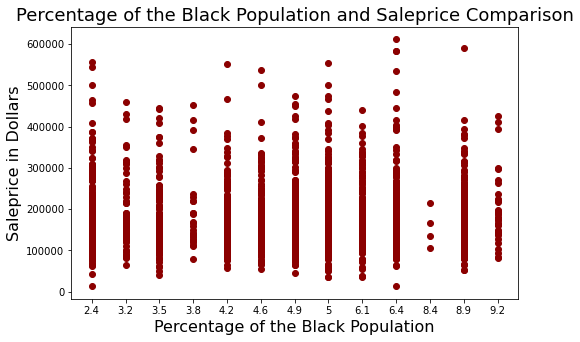

In [182]:
pop = ames_train['percent_pop'].sort_values(ascending=True)
plt.figure(figsize=(8, 5))
plt.scatter(pop, ames_train['saleprice'], color='darkred')

plt.title("Percentage of the Black Population and Saleprice Comparison", fontdict={"fontsize": 18})
plt.xlabel("Percentage of the Black Population", fontsize = 16)
plt.ylabel("Saleprice in Dollars", fontsize = 16);

## Answer Problem, Conclusions, and Recommendations

Goal: Using the Ames, Iowa Housing Kaggle data set, Census Demographic Data for population density by race and hispanic origin along with the Income by Location Median Household Income map create a model to predict the Sales Price of houses in a certain area of Ames, Iowa. <br>

Problem: As the Black or African American populations rise in a census tract area, how does the sale price of houses in Ames, Iowa change? 

At the onset of this project, I thought there would be a distinct relationship between the higher Black populations in a census tract area with the sale price. Unfortunately, with the modeling performed above, I was not able to confirm a correlational relationship between them. 

I was able to create a model that utilized the data for population density by race and the Ames, Iowa Housing data set to predict the sale price of houses. The model had high bias and high variance, so it still needed some adjustments for more accurate predictions. 

Future steps would include:
- Remove outliers for the year the house was built and the year the house had an addition or remodeling features.
- Either find 2010 population census data that is closer to the Ames, IA data set (2006-2010) or find Ames, IA housing data for 2020.
- Adding in more features to help with the high bias. For example, using sale condition because whether a sale is normal, abnormal, partial, between family, or adjoining land could help determine sale price.
    
I would still recommend that the Iowa Real Estate Commission continue to be aware of and combat against possible segregation redlining tactics. Additionally, I would urge the Iowa Real Estate Commission to create learning resources for Black Iowans to educate themselves about their options to becoming homeowners.



## Sources:

Sources can be found in the Executive Summary on the [(README)](https://git.generalassemb.ly/brandiehatch/project-2/blob/main/README.md).